## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [4]:
pd.set_option("display.max_rows",10)

In [5]:
inputdata = pd.read_csv('./input-test1.csv',skiprows = 6, sep=',')
inputdata

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
0,DP 0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0,0.002414
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


In [6]:
inputdata.iloc[1:,:]

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
5,DP 5,80,81.8,85.4,107.8,97.0,119.0,83.0,94.6,0.002529
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


# training, label 분리

In [7]:
TrainData = inputdata.iloc[1:,1:-1]

TrainLabel_ = inputdata.iloc[1:,9]


In [8]:
TrainData

,P1,P2,P3,P4,P5,P6,P7,P8
1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6
2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8
3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6
4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8
5,80,81.8,85.4,107.8,97.0,119.0,83.0,94.6
...,...,...,...,...,...,...,...,...
96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6
97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2
98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0
99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8


In [9]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [10]:
pd.set_option("Display.max_rows",101)
TrainLabel.shape

(100, 1)

<Figure size 720x360 with 0 Axes>

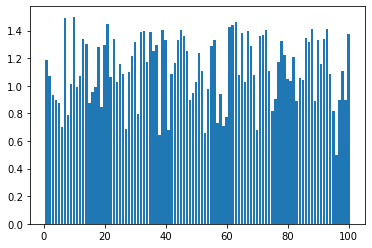

<Figure size 720x360 with 0 Axes>

In [11]:
x = list(range(1,101,1))
y = []
for i in range(100):
    y = np.append(y,float(TrainLabel.iloc[i]))
plt.bar(x,y)
plt.figure(figsize = (10,5))

## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [12]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [13]:
TrainData.shape[1]

8

In [14]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = TrainData.shape[1]
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [ ]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/ANN_prediction2.0/slope label/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction2.0/slope label/Tr_result%d.csv'%(M+1), index=None)

In [ ]:
# Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction1.0/Tr_result1.csv', index=None)

In [ ]:
(model.predict(TrainData)-0.5)*dist_value+min_value

# K fold 분할

In [12]:
TrainData.shape, TrainLabel.shape

((100, 8), (100, 1))

In [13]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)

In [14]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  =  TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,P1,P2,P3,P4,P5,P6,P7,P8
1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6
2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8
3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6
4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8
5,80,81.8,85.4,107.8,97.0,119.0,83.0,94.6
6,80,82.2,99.0,85.4,112.2,109.0,100.6,81.4
7,80,82.6,115.0,95.0,97.8,82.6,80.2,117.0
8,80,83.0,95.8,113.4,93.4,118.6,106.2,85.8
9,80,83.4,88.2,111.0,119.8,100.6,90.2,97.4
10,80,83.8,82.2,81.0,97.4,90.6,90.6,119.8


In [15]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 8), (80, 1))

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [19]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction1.0/Tr_result_epoch20000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/MLmodels_kfold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/MLmodels_kfold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:55.31984,   MAE: 55.12616,  MAPE: 5202.47%
[100 Epochs]    RMSE:0.27702,   MAE: 0.20848,  MAPE: 18.98%
[200 Epochs]    RMSE:0.31252,   MAE: 0.28370,  MAPE: 25.74%
[300 Epochs]    RMSE:0.23429,   MAE: 0.18345,  MAPE: 17.90%
[400 Epochs]    RMSE:0.18491,   MAE: 0.16045,  MAPE: 15.50%
[500 Epochs]    RMSE:0.15959,   MAE: 0.13608,  MAPE: 13.28%
[600 Epochs]    RMSE:0.39662,   MAE: 0.38830,  MAPE: 35.54%
[700 Epochs]    RMSE:0.24094,   MAE: 0.22143,  MAPE: 20.33%
[800 Epochs]    RMSE:0.20337,   MAE: 0.17719,  MAPE: 15.97%
[900 Epochs]    RMSE:0.22389,   MAE: 0.19940,  MAPE: 17.80%
[1000 Epochs]    RMSE:0.18986,   MAE: 0.16738,  MAPE: 14.62%
[1100 Epochs]    RMSE:0.37219,   MAE: 0.36187,  MAPE: 32.63%
[1200 Epochs]    RMSE:0.07894,   MAE: 0.05724,  MAPE: 5.72%
[1300 Epochs]    RMSE:0.14724,   MAE: 0.12913,  MAPE: 11.42%
[1400 Epochs]    RMSE:0.18201,   MAE: 0.16777,  MAPE: 15.14%
[1500

[13500 Epochs]    RMSE:0.01316,   MAE: 0.01043,  MAPE: 1.09%
[13600 Epochs]    RMSE:0.02063,   MAE: 0.01802,  MAPE: 1.72%
[13700 Epochs]    RMSE:0.02079,   MAE: 0.01798,  MAPE: 1.63%
[13800 Epochs]    RMSE:0.01037,   MAE: 0.00854,  MAPE: 0.82%
[13900 Epochs]    RMSE:0.01926,   MAE: 0.01714,  MAPE: 1.69%
[14000 Epochs]    RMSE:0.02128,   MAE: 0.01854,  MAPE: 1.87%
[14100 Epochs]    RMSE:0.01284,   MAE: 0.01064,  MAPE: 1.03%
[14200 Epochs]    RMSE:0.01384,   MAE: 0.01259,  MAPE: 1.20%
[14300 Epochs]    RMSE:0.01806,   MAE: 0.01561,  MAPE: 1.44%
[14400 Epochs]    RMSE:0.02195,   MAE: 0.02011,  MAPE: 1.80%
[14500 Epochs]    RMSE:0.01640,   MAE: 0.01397,  MAPE: 1.18%
[14600 Epochs]    RMSE:0.00965,   MAE: 0.00776,  MAPE: 0.72%
[14700 Epochs]    RMSE:0.00864,   MAE: 0.00706,  MAPE: 0.66%
[14800 Epochs]    RMSE:0.02352,   MAE: 0.02232,  MAPE: 2.05%
[14900 Epochs]    RMSE:0.02093,   MAE: 0.01882,  MAPE: 1.71%
[15000 Epochs]    RMSE:0.01275,   MAE: 0.01151,  MAPE: 1.05%
[15100 Epochs]    RMSE:0

[6800 Epochs]    RMSE:0.07662,   MAE: 0.06880,  MAPE: 6.72%
[6900 Epochs]    RMSE:0.04043,   MAE: 0.03232,  MAPE: 3.08%
[7000 Epochs]    RMSE:0.05121,   MAE: 0.04070,  MAPE: 4.08%
[7100 Epochs]    RMSE:0.05018,   MAE: 0.04334,  MAPE: 4.30%
[7200 Epochs]    RMSE:0.03188,   MAE: 0.02484,  MAPE: 2.35%
[7300 Epochs]    RMSE:0.08228,   MAE: 0.07655,  MAPE: 7.28%
[7400 Epochs]    RMSE:0.03049,   MAE: 0.02265,  MAPE: 2.14%
[7500 Epochs]    RMSE:0.04865,   MAE: 0.03859,  MAPE: 3.88%
[7600 Epochs]    RMSE:0.02677,   MAE: 0.01903,  MAPE: 1.83%
[7700 Epochs]    RMSE:0.05708,   MAE: 0.04898,  MAPE: 4.54%
[7800 Epochs]    RMSE:0.05361,   MAE: 0.04559,  MAPE: 4.24%
[7900 Epochs]    RMSE:0.07304,   MAE: 0.06743,  MAPE: 6.48%
[8000 Epochs]    RMSE:0.02797,   MAE: 0.02033,  MAPE: 2.01%
[8100 Epochs]    RMSE:0.04077,   MAE: 0.03454,  MAPE: 3.51%
[8200 Epochs]    RMSE:0.07428,   MAE: 0.06906,  MAPE: 6.42%
[8300 Epochs]    RMSE:0.06292,   MAE: 0.05730,  MAPE: 5.28%
[8400 Epochs]    RMSE:0.02488,   MAE: 0.

[200 Epochs]    RMSE:0.50740,   MAE: 0.46527,  MAPE: 40.09%
[300 Epochs]    RMSE:0.14357,   MAE: 0.11444,  MAPE: 10.41%
[400 Epochs]    RMSE:0.41341,   MAE: 0.39641,  MAPE: 37.29%
[500 Epochs]    RMSE:0.35798,   MAE: 0.32722,  MAPE: 31.83%
[600 Epochs]    RMSE:0.34684,   MAE: 0.31705,  MAPE: 30.67%
[700 Epochs]    RMSE:0.47239,   MAE: 0.46178,  MAPE: 41.97%
[800 Epochs]    RMSE:0.32776,   MAE: 0.29043,  MAPE: 28.59%
[900 Epochs]    RMSE:0.26196,   MAE: 0.23402,  MAPE: 22.55%
[1000 Epochs]    RMSE:0.26573,   MAE: 0.24058,  MAPE: 23.10%
[1100 Epochs]    RMSE:0.08471,   MAE: 0.06191,  MAPE: 5.87%
[1200 Epochs]    RMSE:0.31181,   MAE: 0.30206,  MAPE: 27.55%
[1300 Epochs]    RMSE:0.09137,   MAE: 0.07117,  MAPE: 6.81%
[1400 Epochs]    RMSE:0.28636,   MAE: 0.27515,  MAPE: 25.98%
[1500 Epochs]    RMSE:0.22443,   MAE: 0.20256,  MAPE: 19.44%
[1600 Epochs]    RMSE:0.22657,   MAE: 0.20660,  MAPE: 19.61%
[1700 Epochs]    RMSE:0.25056,   MAE: 0.23958,  MAPE: 22.49%
[1800 Epochs]    RMSE:0.19726,   M

[13900 Epochs]    RMSE:0.01346,   MAE: 0.01014,  MAPE: 0.93%
[14000 Epochs]    RMSE:0.03096,   MAE: 0.02881,  MAPE: 2.61%
[14100 Epochs]    RMSE:0.03425,   MAE: 0.03274,  MAPE: 2.89%
[14200 Epochs]    RMSE:0.01904,   MAE: 0.01671,  MAPE: 1.46%
[14300 Epochs]    RMSE:0.01613,   MAE: 0.01429,  MAPE: 1.34%
[14400 Epochs]    RMSE:0.01303,   MAE: 0.01048,  MAPE: 0.90%
[14500 Epochs]    RMSE:0.01644,   MAE: 0.01363,  MAPE: 1.32%
[14600 Epochs]    RMSE:0.01250,   MAE: 0.00991,  MAPE: 0.94%
[14700 Epochs]    RMSE:0.03688,   MAE: 0.03285,  MAPE: 3.05%
[14800 Epochs]    RMSE:0.01450,   MAE: 0.01163,  MAPE: 1.08%
[14900 Epochs]    RMSE:0.03540,   MAE: 0.03053,  MAPE: 2.66%
[15000 Epochs]    RMSE:0.02182,   MAE: 0.01872,  MAPE: 1.67%
[15100 Epochs]    RMSE:0.02093,   MAE: 0.01815,  MAPE: 1.72%
[15200 Epochs]    RMSE:0.01558,   MAE: 0.01162,  MAPE: 1.12%
[15300 Epochs]    RMSE:0.01769,   MAE: 0.01505,  MAPE: 1.38%
[15400 Epochs]    RMSE:0.01677,   MAE: 0.01298,  MAPE: 1.21%
[15500 Epochs]    RMSE:0

[7200 Epochs]    RMSE:0.05449,   MAE: 0.04971,  MAPE: 4.75%
[7300 Epochs]    RMSE:0.01958,   MAE: 0.01478,  MAPE: 1.48%
[7400 Epochs]    RMSE:0.09760,   MAE: 0.09395,  MAPE: 9.09%
[7500 Epochs]    RMSE:0.03625,   MAE: 0.03175,  MAPE: 3.13%
[7600 Epochs]    RMSE:0.05264,   MAE: 0.04455,  MAPE: 4.55%
[7700 Epochs]    RMSE:0.09254,   MAE: 0.08564,  MAPE: 8.68%
[7800 Epochs]    RMSE:0.05398,   MAE: 0.04817,  MAPE: 4.75%
[7900 Epochs]    RMSE:0.03087,   MAE: 0.02578,  MAPE: 2.63%
[8000 Epochs]    RMSE:0.03822,   MAE: 0.03045,  MAPE: 2.79%
[8100 Epochs]    RMSE:0.05016,   MAE: 0.04326,  MAPE: 4.16%
[8200 Epochs]    RMSE:0.09344,   MAE: 0.08772,  MAPE: 8.31%
[8300 Epochs]    RMSE:0.12859,   MAE: 0.12708,  MAPE: 12.19%
[8400 Epochs]    RMSE:0.02398,   MAE: 0.01959,  MAPE: 1.92%
[8500 Epochs]    RMSE:0.03859,   MAE: 0.03321,  MAPE: 3.27%
[8600 Epochs]    RMSE:0.05247,   MAE: 0.04570,  MAPE: 4.38%
[8700 Epochs]    RMSE:0.03171,   MAE: 0.02512,  MAPE: 2.37%
[8800 Epochs]    RMSE:0.08715,   MAE: 0

[600 Epochs]    RMSE:0.10903,   MAE: 0.09005,  MAPE: 8.63%
[700 Epochs]    RMSE:0.09157,   MAE: 0.07665,  MAPE: 7.17%
[800 Epochs]    RMSE:0.29791,   MAE: 0.29013,  MAPE: 27.04%
[900 Epochs]    RMSE:0.06768,   MAE: 0.05298,  MAPE: 5.34%
[1000 Epochs]    RMSE:0.16131,   MAE: 0.15073,  MAPE: 14.28%
[1100 Epochs]    RMSE:0.06128,   MAE: 0.05146,  MAPE: 4.89%
[1200 Epochs]    RMSE:0.05728,   MAE: 0.04428,  MAPE: 4.45%
[1300 Epochs]    RMSE:0.15745,   MAE: 0.14517,  MAPE: 13.96%
[1400 Epochs]    RMSE:0.17224,   MAE: 0.16075,  MAPE: 15.37%
[1500 Epochs]    RMSE:0.06042,   MAE: 0.04835,  MAPE: 4.79%
[1600 Epochs]    RMSE:0.17226,   MAE: 0.16019,  MAPE: 14.77%
[1700 Epochs]    RMSE:0.28493,   MAE: 0.27900,  MAPE: 26.51%
[1800 Epochs]    RMSE:0.16764,   MAE: 0.15607,  MAPE: 15.05%
[1900 Epochs]    RMSE:0.16841,   MAE: 0.15935,  MAPE: 14.78%
[2000 Epochs]    RMSE:0.11478,   MAE: 0.09943,  MAPE: 9.13%
[2100 Epochs]    RMSE:0.05833,   MAE: 0.04957,  MAPE: 4.75%
[2200 Epochs]    RMSE:0.26837,   MAE

[14200 Epochs]    RMSE:0.01634,   MAE: 0.01372,  MAPE: 1.20%
[14300 Epochs]    RMSE:0.01883,   MAE: 0.01729,  MAPE: 1.64%
[14400 Epochs]    RMSE:0.01000,   MAE: 0.00878,  MAPE: 0.86%
[14500 Epochs]    RMSE:0.04461,   MAE: 0.04248,  MAPE: 4.02%
[14600 Epochs]    RMSE:0.01531,   MAE: 0.01361,  MAPE: 1.28%
[14700 Epochs]    RMSE:0.01507,   MAE: 0.01362,  MAPE: 1.22%
[14800 Epochs]    RMSE:0.01343,   MAE: 0.01218,  MAPE: 1.13%
[14900 Epochs]    RMSE:0.01932,   MAE: 0.01746,  MAPE: 1.68%
[15000 Epochs]    RMSE:0.01759,   MAE: 0.01505,  MAPE: 1.43%
[15100 Epochs]    RMSE:0.01689,   MAE: 0.01546,  MAPE: 1.39%
[15200 Epochs]    RMSE:0.01137,   MAE: 0.00837,  MAPE: 0.80%
[15300 Epochs]    RMSE:0.01146,   MAE: 0.00929,  MAPE: 0.92%
[15400 Epochs]    RMSE:0.00722,   MAE: 0.00566,  MAPE: 0.56%
[15500 Epochs]    RMSE:0.00799,   MAE: 0.00642,  MAPE: 0.63%
[15600 Epochs]    RMSE:0.01906,   MAE: 0.01689,  MAPE: 1.67%
[15700 Epochs]    RMSE:0.01528,   MAE: 0.01443,  MAPE: 1.34%
[15800 Epochs]    RMSE:0

(0.0, 20.0)

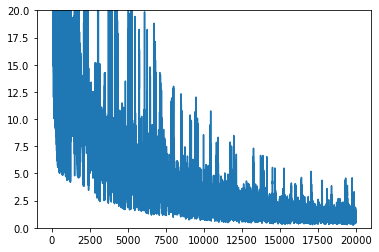

In [20]:
plt.plot(BestModel_temp.history['mape'])
plt.ylim(0,20)

In [21]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/MLmodels_kfold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [49]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [52]:
for F in range (Fold):
    s1 = "real = ValidLabel_Fold%d"%(F+1)
    exec(s1)
    s2 = "predict = Model_Fold%d.predict(ValidData_Fold%d)"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [53]:
Result_Fold1

,0,1
0,1.184604,1.169485
1,1.068196,1.182388
2,0.931607,1.076929
3,0.897109,0.976832
4,0.875775,1.030285
5,0.701544,0.788134
6,1.494161,1.506725
7,0.787439,1.010669
8,1.015200,1.029260
9,1.500000,1.431983


In [54]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,1.184604,1.169485,1.276233,1.276233
1,1.068196,1.182388,-10.690106,10.690106
2,0.931607,1.076929,-15.599062,15.599062
3,0.897109,0.976832,-8.886702,8.886702
4,0.875775,1.030285,-17.642641,17.642641
5,0.701544,0.788134,-12.342727,12.342727
6,1.494161,1.506725,-0.840827,0.840827
7,0.787439,1.010669,-28.348882,28.348882
8,1.015200,1.029260,-1.384906,1.384906
9,1.500000,1.431983,4.534459,4.534459


In [25]:
for F in range (Fold):
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    absError = np.abs(Error)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,absError),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/MLmodels_kfold/Result%d.csv')"%(F+1,F+1)
    exec(s3)
